## Energy Sustainability 

Import essential libraries for analysis


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

Load the IoT Sensor data

In [2]:
TRAIN_FILE = r"data/BO5341_IoTData.csv"
TEST_FILE = r"sample_predict.csv"
OUTPUT_FILE= "sample_predict_output.csv"
test_data_ratio = 0.9

In [3]:
df_iot = pd.read_csv(TRAIN_FILE)

In [4]:
#preview loaded data
df_iot.head()

,X,Product_Qty_Unit,Product_ID,Production_Start_Time,Output_QualityParameter1,Material_ID,Product_Name,Output_QualityParameter2,Output_QualityParameter3,Output_QualityParameter4,...,Stage5_QP1_Actual,Stage5_QP1_High,Stage5_QP2_Low,Stage5_QP2_Actual,Stage5_QP2_High,Stage5_QP3_Low,Stage5_QP3_Actual,Stage5_QP3_High,Stage5_ResourceName,Detergent_Quality
0,1,KG,Product_0407,40656,380.000000,1234,Tide Plus Oxi,15625.00000,39000.0000,7550.0000,...,224.0000,230.0000,0,4.5000,18.0000,0,0.00000,0,Resource_108,Good
1,2,KG,Product_0407,201026,391.082110,1234,Tide Plus Oxi,14202.98200,36257.6125,7151.5015,...,231.3225,231.3225,0,18.1476,18.1476,0,0.00000,0,Resource_108,Good
2,3,KG,Product_0407,81616,386.162120,1234,Tide Plus Oxi,16356.86700,39566.6110,8368.5133,...,232.6450,232.6450,0,70.1316,18.2952,0,2.17962,0,Resource_108,Good
3,4,KG,Product_0407,202857,392.747275,1234,Tide Plus Oxi,12883.11125,36072.7115,7164.5108,...,223.7950,233.9675,0,4.6107,18.4428,0,0.00000,0,Resource_108,Good
4,5,KG,Product_0407,81630,386.824660,1234,Tide Plus Oxi,12485.47900,34779.1900,8256.9300,...,231.1980,235.2900,0,4.6476,18.5904,0,0.00000,0,Resource_108,Good


In [5]:
#Dropping some features
df=df_iot.drop(['Product_Qty_Unit','Product_ID','Product_Name','AssemblyLine_ID','Site_location','Stage1_PrevProduct','Stage1_ResourceName','Stage2_QP3_High','Stage3_ResourceName','Stage4_PrevProduct','Stage4_QP3_High','Stage4_ResourceName','Stage5_PrevProduct','Stage5_ResourceName','Detergent_Quality','Manufacturing_StartDate','Manufacturing_EndDate','Manufacturing_StartTS','Manufacturing_EndTS'],axis=1)

In [6]:
# Viewing first 5 rows
df.head()

,X,Production_Start_Time,Output_QualityParameter1,Material_ID,Output_QualityParameter2,Output_QualityParameter3,Output_QualityParameter4,ManufacturingOrder_ID,Order_Quantity,Produced_Quantity,...,Stage5_DelayFlag,Stage5_QP1_Low,Stage5_QP1_Actual,Stage5_QP1_High,Stage5_QP2_Low,Stage5_QP2_Actual,Stage5_QP2_High,Stage5_QP3_Low,Stage5_QP3_Actual,Stage5_QP3_High
0,1,40656,380.000000,1234,15625.00000,39000.0000,7550.0000,1,3800,0.0,...,Yes,210.0000,224.0000,230.0000,0,4.5000,18.0000,0,0.00000,0
1,2,201026,391.082110,1234,14202.98200,36257.6125,7151.5015,2,3800,3140.0,...,No,211.2075,231.3225,231.3225,0,18.1476,18.1476,0,0.00000,0
2,3,81616,386.162120,1234,16356.86700,39566.6110,8368.5133,3,3800,0.0,...,Yes,212.4150,232.6450,232.6450,0,70.1316,18.2952,0,2.17962,0
3,4,202857,392.747275,1234,12883.11125,36072.7115,7164.5108,4,3800,3800.0,...,Yes,213.6225,223.7950,233.9675,0,4.6107,18.4428,0,0.00000,0
4,5,81630,386.824660,1234,12485.47900,34779.1900,8256.9300,5,3800,0.0,...,No,214.8300,231.1980,235.2900,0,4.6476,18.5904,0,0.00000,0


In [7]:
#Setting Flag's to numerical values
df['Stage1_ProductChange_Flag'] = np.where(df['Stage1_ProductChange_Flag'] == 'Yes', 1, 0)
df['Stage1_DelayFlag'] = np.where(df['Stage1_DelayFlag'] == 'Yes', 1, 0)
df['Stage2_DelayFlag'] = np.where(df['Stage2_DelayFlag'] == 'Yes', 1, 0)
df['Stage2_ProductChange_Flag'] = np.where(df['Stage2_ProductChange_Flag'] == 'Yes', 1, 0)
df['Stage3_DelayFlag'] = np.where(df['Stage3_DelayFlag'] == 'Yes', 1, 0)
df['Stage3_ProductChange_Flag'] = np.where(df['Stage3_ProductChange_Flag'] == 'Yes', 1, 0)
df['Stage4_DelayFlag'] = np.where(df['Stage4_DelayFlag'] == 'Yes', 1, 0)
df['Stage5_ProductChange_Flag'] = np.where(df['Stage5_ProductChange_Flag'] == 'Yes', 1, 0)
df['Stage5_DelayFlag'] = np.where(df['Stage1_ProductChange_Flag'] == 'Yes', 1, 0)

In [8]:
label=np.where(df_iot['Detergent_Quality']=='Good',1,0)

In [9]:
df.shape

(1000, 103)

In [10]:
# train,test = df_iot.split_frame(ratios=[.9],  seed=21)
X_train, X_test, y_train, y_test=train_test_split(df, label, test_size=test_data_ratio, random_state = 122)

In [11]:
# Function for deriving a classification report & Confusion matrix for any algorithm
def compute_metrics(data, y_true, model_obj, model):

        # Make predictions
    y_pred = model_obj.predict(data)
    print(metrics.classification_report(y_true, y_pred,target_names = ['good', 'bad']))
    
    cm = confusion_matrix(y_true, y_pred, labels=model_obj.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['good', 'bad'])
    disp.plot()
    plt.show()

In [12]:
from sklearn.linear_model import LogisticRegressionCV,LogisticRegression
from sklearn import svm
# Initialize the model 
lr_reg = LogisticRegressionCV(Cs=20, cv=3, random_state=122)

# fit the model
lr_reg.fit(X_train, y_train)

C:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:

LogisticRegressionCV(Cs=20, cv=3, random_state=122)

              precision    recall  f1-score   support

        good       1.00      0.94      0.97        16
         bad       0.99      1.00      0.99        84

    accuracy                           0.99       100
   macro avg       0.99      0.97      0.98       100
weighted avg       0.99      0.99      0.99       100



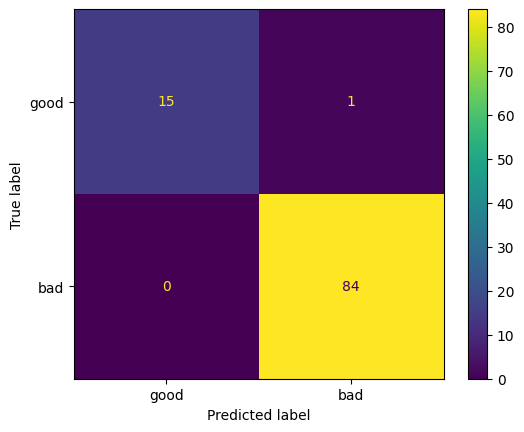

In [13]:
lr_metrics_train =  compute_metrics(X_train, y_train, lr_reg, 'LogisticRegression')
lr_metrics_train

              precision    recall  f1-score   support

        good       0.43      0.48      0.45       209
         bad       0.84      0.80      0.82       691

    accuracy                           0.73       900
   macro avg       0.63      0.64      0.64       900
weighted avg       0.74      0.73      0.73       900



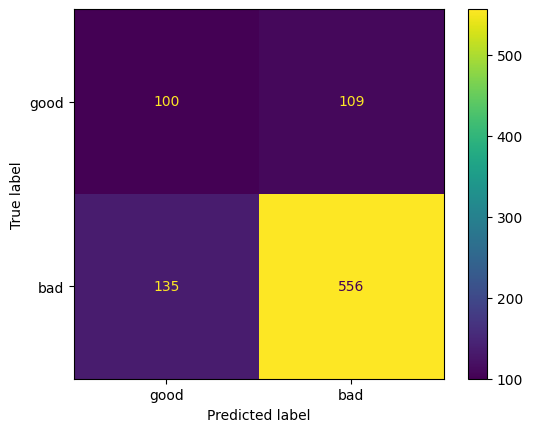

In [14]:
lr_metrics =  compute_metrics(X_test, y_test, lr_reg, 'LogisticRegression')
lr_metrics

#### Save/Download model

In [15]:
import pickle
with open("model.pkl", "wb") as file:
    pickle.dump(lr_reg, file)

#### Sample data with prediction

In [16]:
with open("model.pkl", "rb") as file:
    model = pickle.load(file)

In [17]:
def preprocess(df_input):
    #Dropping some features
    df_input=df_input.drop(['Product_Qty_Unit','Product_ID','Product_Name','AssemblyLine_ID','Site_location','Stage1_PrevProduct','Stage1_ResourceName','Stage2_QP3_High','Stage3_ResourceName','Stage4_PrevProduct','Stage4_QP3_High','Stage4_ResourceName','Stage5_PrevProduct','Stage5_ResourceName','Manufacturing_StartDate','Manufacturing_EndDate','Manufacturing_StartTS','Manufacturing_EndTS'],axis=1)
    #Setting Flag's to numerical values
    df_input['Stage1_ProductChange_Flag'] = np.where(df_input['Stage1_ProductChange_Flag'] == 'Yes', 1, 0)
    df_input['Stage1_DelayFlag'] = np.where(df_input['Stage1_DelayFlag'] == 'Yes', 1, 0)
    df_input['Stage2_DelayFlag'] = np.where(df_input['Stage2_DelayFlag'] == 'Yes', 1, 0)
    df_input['Stage2_ProductChange_Flag'] = np.where(df_input['Stage2_ProductChange_Flag'] == 'Yes', 1, 0)
    df_input['Stage3_DelayFlag'] = np.where(df_input['Stage3_DelayFlag'] == 'Yes', 1, 0)
    df_input['Stage3_ProductChange_Flag'] = np.where(df_input['Stage3_ProductChange_Flag'] == 'Yes', 1, 0)
    df_input['Stage4_DelayFlag'] = np.where(df_input['Stage4_DelayFlag'] == 'Yes', 1, 0)
    df_input['Stage5_ProductChange_Flag'] = np.where(df_input['Stage5_ProductChange_Flag'] == 'Yes', 1, 0)
    df_input['Stage5_DelayFlag'] = np.where(df_input['Stage1_ProductChange_Flag'] == 'Yes', 1, 0)
    return df_input

In [18]:
sample_df=pd.read_csv(TEST_FILE)

In [19]:
pre_processed_df=preprocess(sample_df)
sample_df["Pedicted_Detergent_Quality"]=model.predict(pre_processed_df)
sample_df["Pedicted_Detergent_Quality"]=np.where(sample_df['Pedicted_Detergent_Quality']==1,"Good","Bad")
sample_df.to_csv(OUTPUT_FILE,index=False)